In [1]:
import numpy as np
import pandas as pd
import rasterio
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy
import pymannkendall as mk

In [2]:
lat = np.array([49.9166666666664 - i * 0.0416666666667 for i in range(357)])
lon = np.array([-105.0416666666507 + i * 0.0416666666667 for i in range(722)])
Lon, Lat = np.meshgrid(lon, lat)

am = rasterio.open('PRISM_tmin_stable_4kmD2_19810101_bil.bil')
a = am.read()[0, :357, 479:1201]
mask = np.where(a>-1000, 1, 0)

tmin81 = np.load('./prism/mw_tmin/1981_tmin.npz')['tmin']
t, y, x = tmin81.shape
y, x

(357, 722)

In [ ]:
# MonStart = [59, 90, 120]
# MonStartLeap = [60, 91, 121]
# MonDays = [31, 30, 31]
# Tcriteria = [0, -5, -10, -15, -20]
# March = np.zeros((38, 5, 31))
# April = np.zeros((38, 5, 30))
# May = np.zeros((38, 5, 31))
# count = [March, April, May]

# for yl in range(38):
#     tmin = np.load(f'./prism/mw_tmin/{1981+yl}_tmin.npz')['tmin']
#     tmin = np.where(tmin>-100, tmin, np.nan)
#     if (1981+yl)%4:
#         MonS = MonStart
#     else:
#         MonS = MonStartLeap
#     for mi in range(3):
#         for ti in range(5):
#             count[mi][yl, ti, :] = np.array([np.where(tmin[MonS[mi]+di, :, :]<Tcriteria[ti], 1, 0).sum()/(y*x) for di in range(MonDays[mi])])

# np.save('./var/MarchCount', count[0])
# np.save('./var/AprilCount', count[1])
# np.save('./var/MayCount', count[2])

In [ ]:
# states = ['MI', 'ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'OH', 'KY', 'WV', 'PA']
# mdmask = [np.load(f'./var/{states[ii]}_mask.npy') for ii in range(16)]

# MonStart = [59, 90, 120]
# MonStartLeap = [60, 91, 121]
# MonDays = [31, 30, 31]
# Tcriteria = [0, -5, -10, -15, -20]
# March = np.zeros((38, 5, 16, 31))
# April = np.zeros((38, 5, 16, 30))
# May = np.zeros((38, 5, 16, 31))
# count = [March, April, May]

# for yl in range(38):
#     tmin = np.load(f'./prism/mw_tmin/{1981+yl}_tmin.npz')['tmin']
#     tmin = np.where(tmin>-100, tmin, np.nan)
#     if (1981+yl)%4:
#         MonS = MonStart
#     else:
#         MonS = MonStartLeap
#     for mi in range(3):
#         for ti in range(5):
#             for si in range(16):
#                 count[mi][yl, ti, si, :] = np.array([np.where(np.where(mdmask[si], tmin[MonS[mi]+di, :, :], np.nan)<Tcriteria[ti], 1, 0).sum() / mdmask[si].sum() for di in range(MonDays[mi])])

# np.save('./var/MarchCountState', count[0])
# np.save('./var/AprilCountState', count[1])
# np.save('./var/MayCountState', count[2])

In [ ]:
# March = np.load('./var/MarchCount.npy') * (y*x) / mask.sum()
# April = np.load('./var/AprilCount.npy') * (y*x) / mask.sum()
# May = np.load('./var/MayCount.npy') * (y*x) / mask.sum()

In [ ]:
# fig = plt.figure(figsize=(8, 6))
# X = np.arange(1981, 2019)
# plt.plot(X, March[:, 0, :].sum(axis=1), 'b-o', lw=1, ms=3)
# plt.plot(X, March[:, 1, :].sum(axis=1), 'g-o', lw=1, ms=3)
# plt.plot(X, March[:, 2, :].sum(axis=1), 'y-o', lw=1, ms=3)
# plt.plot(X, March[:, 3, :].sum(axis=1), 'm-o', lw=1, ms=3)
# plt.plot(X, March[:, 4, :].sum(axis=1), 'c-o', lw=1, ms=3)
# plt.xticks(np.arange(1981, 2018, 3), [str(X[i]) for i in range(0, 38, 3)])
# plt.ylim(0, 25)
# plt.legend(['Tmin<0\u2103', 'Tmin<-5\u2103', 'Tmin<-10\u2103', 'Tmin<-15\u2103', 'Tmin<-20\u2103'], frameon=False)
# plt.title('31 days Sum of Area Percentage in March', fontsize='large', fontweight='bold')
# plt.savefig('./plot/Composite/MarchTotal.png', bbox_inches='tight')

<font size=4 color=blue>slope of area percentage

In [3]:
def color_PositiveNegative(s):
    if s[0] == '-':
        color = 'blue'
        if s[-1] == '*':
            color = 'deepskyblue'
    else:
        color = 'red'
        if s[-1] == '*':
            color = 'magenta'
    return 'color: %s' % color

In [4]:
def color_significance_red(s):
    if s[-1] == '*':
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

In [4]:
states = ['MI', 'ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'OH', 'KY', 'WV', 'PA']
mdmask = [np.load(f'./var/{states[ii]}_mask.npy') for ii in range(16)]
Tcriteria = [0, -5, -10, -15, -20]

March = np.load('./var/MarchCountState.npy').sum(axis=3)
April = np.load('./var/AprilCountState.npy').sum(axis=3)
May = np.load('./var/MayCountState.npy').sum(axis=3)
data = [March, April, May]
slope = np.zeros((3, 5, 16))
pvalue = np.zeros((3, 5, 16))
X = np.linspace(1, 38, 38)
for mi in range(3):
    for ti in range(5):
        for si in range(16):
            r = stats.linregress(X[:], data[mi][:, ti, si])
            slope[mi, ti, si] = r.slope
            pvalue[mi, ti, si] = r.pvalue
table = [[[] for i in range(5)] for j in range(16)]
mi = 0
for si in range(16):
    for ti in range(5):
        if pvalue[mi, ti, si] < .1:
            table[si][ti] = f'{(slope[mi, ti, si]):.3f}*'
        else:
            table[si][ti] = f'{(slope[mi, ti, si]):.3f}'
table = pd.DataFrame(table)
table = table.rename(index={i:states[i] for i in range(16)}, columns={i:Tcriteria[i] for i in range(5)})
# table.style.applymap(color_significance_red)
# table.style.applymap(color_PositiveNegative)

In [24]:
indi = ['nino34.csv', 'nao.csv', 'pna.csv']
mn = [str(i) for i in range(3, 12)]
indices_season = []
indices_mon = []
for ii in range(3):
    df = pd.read_csv(f'./index/{indi[ii]}')
    temp = []
    for s in range(3):
        temp.append((np.array(df[mn[3*s]][1:]) + np.array(df[mn[3*s+1]][1:]) + np.array(df[mn[3*s+2]][1:])) / 3.0)
    w = [(df['12'][k] + df['1'][k+1] + df['2'][k+1])/ 3 for k in range(39)]
    temp.append(np.array(w))
    indices_season.append(np.array(temp))
    
    indices_mon.append(np.array([np.array(df['3'][1:]), np.array(df['4'][1:]), np.array(df['5'][1:])]))
indices_season = np.array(indices_season)
indices_mon = np.array(indices_mon)

In [10]:
# def norm(x):
#     x_mean = x.mean()
#     sd = np.sqrt(((x - x_mean)**2).sum() / len(x))
#     return (x - x_mean) / sd

# for ii in range(3):
#     for si in range(4):
#         indices_season[ii, si, :] = norm(indices_season[ii, si, :])
# for ii in range(3):
#     for mi in range(3):
#         indices_mon[ii, mi, :] = norm(indices_mon[ii, mi, :])

In [30]:
# states = ['MI', 'ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'OH', 'KY', 'WV', 'PA']
# mdmask = [np.load(f'./var/{states[ii]}_mask.npy') for ii in range(16)]
# Tcriteria = [0, -5, -10, -15, -20]

# March = np.load('./var/MarchCountState.npy').sum(axis=3)
# April = np.load('./var/AprilCountState.npy').sum(axis=3)
# May = np.load('./var/MayCountState.npy').sum(axis=3)
# data = [March, April, May]
    
# slope = np.zeros((3, 3, 5, 16))
# pvalue = np.zeros((3, 3, 5, 16))
# for ii in range(3):
#     for mi in range(3):
#         index = indices_mon[ii, mi, :]
#         for ti in range(5):
#             for si in range(16):
#                 r = stats.linregress(index, data[mi][:, ti, si])
#                 slope[ii, mi, ti, si] = r.rvalue
#                 pvalue[ii, mi, ti, si] = r.pvalue

IndName = ['Nino34', 'NAO', 'PNA']
MonName = [' March', 'April', 'May']
table = [[[] for i in range(5)] for j in range(16)]
ii = 2
mi = 2
for si in range(16):
    for ti in range(5):
        if pvalue[ii, mi, ti, si] < .05:
            table[si][ti] = f'{(slope[ii, mi, ti, si]):.3f}**'
        elif pvalue[ii, mi, ti, si] < .1:
            table[si][ti] = f'{(slope[ii, mi, ti, si]):.3f}*'
        else:
            table[si][ti] = f'{(slope[ii, mi, ti, si]):.3f}'
table = pd.DataFrame(table)
table = table.rename(index={i:states[i] for i in range(16)}, columns={i:Tcriteria[i] for i in range(5)})
print(f'Freezing Days in {MonName[mi]} related to {IndName[ii]}')
table.style.applymap(color_PositiveNegative)
# table.style.to_excel('./Indices_FreezingDays.xlsx', engine='openpyxl')

Freezing Days in May related to PNA


,0,-5,-10,-15,-20
MI,0.349**,0.063,0.071,0.000,0.000
ND,0.131,0.233,-0.064,0.000,0.000
SD,0.145,0.246,0.200,0.007,0.000
NE,0.184,0.289*,-0.025,0.000,0.000
KS,0.302*,0.005,0.000,0.000,0.000
OK,0.037,-0.029,0.000,0.000,0.000
MN,0.291*,0.198,0.165,0.000,0.000
IA,0.302*,0.305*,0.000,0.000,0.000
MO,0.295*,0.000,0.000,0.000,0.000
WI,0.348**,0.090,0.000,0.000,0.000


In [104]:
# states = ['MI', 'ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'OH', 'KY', 'WV', 'PA']
# mdmask = [np.load(f'./var/{states[ii]}_mask.npy') for ii in range(16)]
# Tcriteria = [0, -5, -10, -15, -20]

# March = np.load('./var/MarchCountState.npy').sum(axis=3)
# April = np.load('./var/AprilCountState.npy').sum(axis=3)
# May = np.load('./var/MayCountState.npy').sum(axis=3)
# data = March + April + May
    
# slope = np.zeros((3, 5, 16))
# pvalue = np.zeros((3, 5, 16))
# for ii in range(3):
#     index = indices_season[ii, 3, :]   
#     for ti in range(5):
#         for si in range(16):
#             r = stats.linregress(index, data[:, ti, si])
#             slope[ii, ti, si] = r.slope
#             pvalue[ii, ti, si] = r.pvalue

table = [[[] for i in range(5)] for j in range(16)]
ii = 2
for si in range(16):
    for ti in range(5):
        if pvalue[ii, ti, si] < .05:
            table[si][ti] = f'{(slope[ii, ti, si]):.3f}**'
        elif pvalue[ii, ti, si] < .1:
            table[si][ti] = f'{(slope[ii, ti, si]):.3f}*'
        else:
            table[si][ti] = f'{(slope[ii, ti, si]):.3f}'
table = pd.DataFrame(table)
table = table.rename(index={i:states[i] for i in range(16)}, columns={i:Tcriteria[i] for i in range(5)})
# table.style.applymap(color_PositiveNegative)

In [53]:
May.shape

(38, 5, 16)

<font size=4 color=blue>Freezing days count

In [60]:
# MonStart = [59, 90, 120]
# MonStartLeap = [60, 91, 121]
# MonDays = [31, 30, 31]
# Tcriteria = [0, -5, -10, -15, -20]
# count = np.zeros((39, 3, y, x))
# for yl in range(39):
#     tmin = np.load(f'./prism/mw_tmin/{1981+yl}_tmin.npz')['tmin']
#     tmin = np.where(tmin>-100, tmin, np.nan)
#     if (1981+yl)%4:
#         MonS = MonStart
#     else:
#         MonS = MonStartLeap
#     for mi in range(3):
#         S = MonS[mi]
#         E = S + MonDays[mi]
#         for ti in range(1):
#             count[yl, mi, :, :] = np.where(tmin[S:E, :, :]<Tcriteria[ti], 1, 0).sum(axis=0)

# np.save('./var/Min0DaysCount', count)

<ipython-input-60-c76792457480>:17: RuntimeWarning: invalid value encountered in less
  count[yl, mi, :, :] = np.where(tmin[S:E, :, :]<Tcriteria[ti], 1, 0).sum(axis=0)


In [57]:
# MonStart = [59, 90, 120]
# MonStartLeap = [60, 91, 121]
# MonDays = [31, 30, 31]
# count = [np.zeros((38*MonDays[mi], y, x)) for mi in range(3)]

# for yl in range(38):
#     tmin = np.load(f'./prism/mw_tmin/{1981+yl}_tmin.npz')['tmin']
#     tmin = np.where(tmin>-100, tmin, np.nan)
#     if (1981+yl)%4:
#         MonS = MonStart
#     else:
#         MonS = MonStartLeap
        
#     for mi in range(3):
#         S = MonS[mi]
#         E = S + MonDays[mi]
#         count[mi][yl*MonDays[mi]:(yl+1)*MonDays[mi], :, :] = np.where(tmin[S:E, :, :]<0, 1, 0)

# count44 = [np.zeros((38*MonDays[mi], y//4, x//4)) for mi in range(3)]
# for mi in range(3):
#     count44[mi][:, :, :] = np.array([[(count[mi][:,i:(y-y%4):4,j:(x-x%4):4]) for j in range(4)] for i in range(4)]).sum(axis=(0,1))

# np.save('./var/count44March', count44[0])
# np.save('./var/count44April', count44[1])
# np.save('./var/count44May', count44[2])

In [61]:
count = np.load('./var/Min0DaysCount.npy')
count_mean = count.mean(axis=0)
count_mean = np.where(abs(count_mean)<.000001, np.nan, count_mean)
count_std = count.std(axis=0)
count_std = np.where(abs(count_std)<.000001, np.nan, count_std)
count = np.where(count==0, np.nan, count)

# slope = np.zeros((3, y, x)) * np.nan
# pvalue = np.zeros((3, y, x)) * np.nan
# X = np.linspace(1, 39, 39)

# for i in range(y):
#     for j in range(x):
#         if mask[i, j]:
#             for mi in range(3):
#                 counttemp = count[:, mi, i, j]
#                 flag = np.where(np.isnan(counttemp), False, True)
#                 if flag.sum()>1:
#                     r = stats.linregress(X[flag], counttemp[flag])
#                     slope[mi, i, j] = r.slope
#                     pvalue[mi, i, j] = r.pvalue
# np.save('./var/Min0DaysSlope', slope)
# np.save('./var/Min0DaysPvalue', pvalue)
slope = np.load('./var/Min0DaysSlope.npy')
pvalue = np.load('./var/Min0DaysPvalue.npy')

<font size=4 color=blue>Theil-Sen Slope and Mann-Kendall test

In [3]:
count = np.load('./var/Min0DaysCount.npy')
count_mean = count.mean(axis=0)
count_mean = np.where(abs(count_mean)<.000001, np.nan, count_mean)
count_std = count.std(axis=0)
count_std = np.where(abs(count_std)<.000001, np.nan, count_std)
count = np.where(count==0, np.nan, count)

slope = np.load('./var/Min0DaysSlopeMK.npy')
pvalue = np.load('./var/Min0DaysPvalueMK.npy')
trend = np.load('./var/Min0DaysTrendMK.npy')


# def trend2num(trend):
#     if trend == 'decreasing':
#         return -1
#     elif trend == 'increasing':
#         return 1
#     elif trend == 'no trend':
#         return 0
    
# slope = np.zeros((3, y, x)) * np.nan
# pvalue = np.zeros((3, y, x)) * np.nan
# trend = np.zeros((3, y, x)) * np.nan
# for i in range(y):
#     for j in range(x):
#         if mask[i, j]:
#             for mi in range(3):
#                 counttemp = count[:, mi, i, j]
#                 flag = np.where(np.isnan(counttemp), False, True)
#                 if flag.sum()>2:
#                     r = mk.original_test(counttemp[flag])
#                     slope[mi, i, j] = r.slope
#                     pvalue[mi, i, j] = r.p
#                     trend[mi, i, j] = trend2num(r.trend)
# np.save('./var/Min0DaysSlopeMK', slope)
# np.save('./var/Min0DaysPvalueMK', pvalue)
# np.save('./var/Min0DaysTrendMK', trend)

In [62]:
png = ['Min0DaysCount_mean', 'Min0DaysCount_std', 'Min0DaysCount_trend']
title = ['38 year mean', 'Standard Deviation', 'Trend']
month = ['March', 'April', 'May']
data = [count_mean, count_std/count_mean, slope]
# data = [count_mean, count_std/count_mean, trend]
extent = [-105, -75, 34, 49]
ll = [0, 0, -.3]
lr = [30, 2, .3]
# ll = [0, 0, -1]
# lr = [30, 2, 1]
step = [5, .4, .1]
color = ['jet_r', 'jet', 'bwr']
extend = ['max', 'max', 'both']
ch = [.625, .325, .025]
fig, axs = plt.subplots(3, 3, figsize=(15, 9))
for ii in range(3):
    for mi in range(3):
        ax = plt.subplot(3,3,ii*3+mi+1, projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
        ax.set_extent(extent)
        ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
        ax.add_feature(cartopy.feature.BORDERS, lw=.3, linestyle=':')
        ax.add_feature(cartopy.feature.COASTLINE, lw=.3, linestyle=':')
        ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)

        levels = MaxNLocator(nbins=100).tick_values(ll[ii], lr[ii])
        cmap = plt.get_cmap(color[ii])
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

        pc = plt.pcolormesh(Lon, Lat, np.where(mask, data[ii][mi, :, :], np.nan), norm=norm, cmap=cmap, transform=ccrs.PlateCarree())
        if ii == 2:
            plt.scatter(Lon, Lat, np.where(np.logical_and(pvalue[mi, :, :]<0.05, mask), .1, np.nan), 'grey', alpha=.1, transform=ccrs.PlateCarree())

        plt.title(f'{title[ii]} in {month[mi]}', fontsize=13, fontweight='bold')
        fig.subplots_adjust(bottom=0, top=0.9, left=0.1, right=0.9, wspace=0.05, hspace=0.02)
        
        if mi == 2:
            cb_ax = fig.add_axes([0.905, ch[ii], 0.01, 0.25])
            cbar = plt.colorbar(pc, cax=cb_ax, ticks=np.arange(ll[ii], lr[ii]+step[ii], step[ii]), extend=extend[ii])
plt.suptitle('Freezing Days (Tmin<0\u2103) from 1981 to 2019', fontsize=14, fontweight='bold')
plt.savefig(f'./plot/Composite/FreezingDaysMeanStdTrend.png', bbox_inches='tight')
plt.close()

<ipython-input-62-0bbca0d79f36>:31: RuntimeWarning: invalid value encountered in less
  plt.scatter(Lon, Lat, np.where(np.logical_and(pvalue[mi, :, :]<0.05, mask), .1, np.nan), 'grey', alpha=.1, transform=ccrs.PlateCarree())


<font size=4 color=blue>Time series of freezing days count

In [63]:
Tann = np.zeros(39)
for yl in range(39):
    tmin = np.load(f'./prism/mw_tmin/{1981+yl}_tmin.npz')['tmin']
    tmin = np.where(tmin>-100, tmin, np.nan)
    Tann[yl] = np.nanmean(tmin[59:151, :, :])

In [64]:
count = np.load('./var/Min0DaysCount.npy')
X = np.arange(1981, 2020)
Y = count.sum(axis=1).mean(axis=(1,2))
# slope, intercept, r_value, p_value, std_err = stats.linregress(X[:-1], Y[:-1])
r = mk.original_test(Y)
slope = r.slope
pvalue = r.p
intercept = r.intercept

r_Tmin = mk.original_test(Tann)
slope_Tmin = r_Tmin.slope
pvalue_Tmin = r_Tmin.p
intercept_Tmin = r_Tmin.intercept


fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))
ax.plot(X, Y, 'r-o', lw=1, ms=3)
ax.plot(X, intercept + slope*(X-1981), 'r--')
ax.set_ylim(10, 45)
ax.set_yticks(np.arange(10, 50, 5))
ax.set_yticklabels(np.arange(10, 50, 5), color='r', fontsize='large')
ax.set_ylabel('Freeze Events Count', fontsize='large', fontweight='bold')
ax.set_xlabel('Year', fontsize='large', fontweight='bold')
ax.legend(['Spatial averaged Springtime Freeze events over Midwestern US', f'Fitted line with Theil-Sen slope = {slope:.4f}'],
         frameon=False, bbox_to_anchor=(0.5, .52, .47, 0.5), fontsize=12)
ax.xaxis.grid(True)

axx = ax.twinx()
axx.plot(X, Tann, 'b-o', lw=1, ms=3)
axx.plot(X, intercept_Tmin + slope_Tmin*(X-1981), 'b--')
axx.set_ylim(0, 8)
axx.set_yticks(np.arange(0, 9))
axx.set_yticklabels(np.arange(0, 9), color='b', fontsize='large')
axx.set_ylabel('Daily Minimum Temperature', fontsize='large', fontweight='bold')
axx.legend(['Spatial averaged Daily Minimum Temperature over Midwestern US', f'Fitted line with Theil-Sen slope = {slope_Tmin:.4f}'],
          frameon=False, bbox_to_anchor=(0.5, .41, .51, 0.5), fontsize=12)
axx.set_xticks(np.arange(1981, 2019, 3))
axx.set_xticklabels([str(X[i]) for i in range(0, 38, 3)], fontsize='large')

plt.title('Time series of Springtime freeze events from 1981 to 2019', fontsize='large', fontweight='bold')

plt.savefig('./plot/Composite/FreezeCountTimeSeries.png', bbox_inches='tight')
plt.close()
# plt.show()

In [65]:
Tannmean = np.zeros(39)
for yl in range(39):
    tmean = np.load(f'./prism/mw_tmean/{1981+yl}_tmean.npz')['tmean']
    tmean = np.where(tmean>-100, tmean, np.nan)
    Tannmean[yl] = np.nanmean(tmean[59:151, :, :])

In [66]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Tann, Y)
slopem, interceptm, r_valuem, p_valuem, std_errm = stats.linregress(Tannmean, Y)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(Tannmean, Y, 'bo', lw=1, ms=3)
ax.plot(Tannmean, interceptm + slopem*Tannmean, 'b--')
ax.set_xlim(6,13)
ax.set_xticks(np.arange(6,14))
ax.set_xticklabels(np.arange(6,14), fontsize='large', color='b')
ax.set_ylim(10, 35)
ax.set_yticks(np.arange(10, 40, 5))
ax.set_yticklabels(np.arange(10, 40, 5), fontsize='large')
ax.set_ylabel('Freeze Events Count', fontsize='large', fontweight='bold')
ax.set_xlabel('Springtime mean temperature', fontsize='large', fontweight='bold', color='b')
ax.text(6.5, 18, f'slope = {slopem:.4f}', fontsize='large', color='b')
ax.text(6.5, 16, f'pvalue = {p_valuem:.4f}', fontsize='large', color='b')
ax.text(6.5, 14, f'Rsquared = {r_valuem**2:.4f}', fontsize='large', color='b')

axx = ax.twiny()
axx.plot(Tann, Y, 'ro', lw=1, ms=3)
axx.plot(Tann, intercept + slope*Tann, 'r--')
axx.set_xlim(0, 7)
axx.set_xticks(np.arange(0, 8))
axx.set_xticklabels(np.arange(0, 8), fontsize='large', color='r')
axx.set_xlabel('Springtime minimum temperature', fontsize='large', fontweight='bold', color='r')
axx.text(4.5, 32, f'slope = {slope:.4f}', fontsize='large', color='r')
axx.text(4.5, 30, f'pvalue = {p_value:.4f}', fontsize='large', color='r')
axx.text(4.5, 28, f'Rsquared = {r_value**2:.4f}', fontsize='large', color='r')

# plt.title('Springtime Freeze Events vs Mean Temperature', fontsize='large', fontweight='bold')

plt.savefig('./plot/Composite/FreezeCountTann.png', bbox_inches='tight')
plt.close()

<font size=4 color=blue>trend of freezing days in April at individual location

In [5]:
latloc = [45.993005, 44.661906, 41.309247, 39.710815, 36.289078]
lonloc = [-87.647226, -84.546377, -87.292439, -81.960948, -97.326834]
yloc = np.zeros(5)
xloc = np.zeros(5)
for li in range(5):
    yloc[li] = np.argmin(abs(lat-latloc[li]))
    xloc[li] = np.argmin(abs(lon-lonloc[li]))
yloc = yloc.astype(int)
xloc = xloc.astype(int)
Aprcount = count[:, 1, :, :]
X = np.linspace(1, 38, 38)
li = 4
# plt.figure(figsize=(8, 6))
# plt.bar(X, Aprcount[:, yloc[li], xloc[li]])
# plt.xticks(np.arange(1, 39, 2), [str(1981+i)[2:] for i in range(0, 39, 2)])
# plt.ylim(0, 31)
# plt.title(str(li+1), fontsize='large', fontweight='bold')
# plt.show()

In [8]:
# fig = plt.figure(figsize=(8, 6))
# extent = [-105, -75, 34, 49]
# ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
# ax.set_extent(extent)
# states = NaturalEarthFeature(category="cultural", scale="50m",
#                              facecolor="none",
#                              name="admin_1_states_provinces_shp")
# ax.add_feature(states, linewidth=.3, edgecolor="black")
# ax.add_feature(cartopy.feature.BORDERS, lw=.3, linestyle=':')
# ax.add_feature(cartopy.feature.COASTLINE, lw=.3, linestyle=':')
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)

# levels = MaxNLocator(nbins=100).tick_values(-.3, .3)
# cmap = plt.get_cmap('bwr')
# norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# pc = plt.pcolormesh(Lon, Lat, slope[1, :, :], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
# plt.scatter(Lon, Lat, np.where(pvalue[1, :, :]<0.05, 1, np.nan), 'grey', alpha=.1, transform=ccrs.PlateCarree())
# for k in range(5):
#     ax.plot(lonloc[k], latloc[k], 'c*', markersize=7, transform=ccrs.PlateCarree())
#     ax.text(lonloc[k]-.5, latloc[k]+.3, f'{k+1}', c='m', fontsize=15, transform=ccrs.PlateCarree())

# plt.title(f'Trend of Freezing Days (Tmin<0\u2103) from 1981 to 2018', fontsize=13, fontweight='bold')

# fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
# cb_ax = fig.add_axes([0.905, 0.12, 0.02, 0.72])
# cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(-.3, .31, .1), extend='both') 

In [6]:
# count = np.load('./var/Min0DaysCount.npy')
# count_mean = count.sum(axis=1).mean(axis=0)
# count_std = count.sum(axis=1).std(axis=0)
# slope = np.zeros((y, x))
# pvalue = np.zeros((y, x))
# X = np.linspace(1, 38, 38)

# for i in range(y):
#     for j in range(x):
#         if mask[i, j]:
#             r = stats.linregress(X, count[:, :, i, j].sum(axis=1))
#             slope[i, j] = r.slope
#             pvalue[i, j] = r.pvalue

title = ['38 year mean', 'Standard Deviation', 'Trend']
data = [count_mean, count_std, slope]
extent = [-105, -75, 34, 49]
ll = [0, 0, -.3]
lr = [60, 12, .3]
step = [10, 2, .1]
color = ['jet_r', 'jet', 'bwr']
extend = ['max', 'max', 'both']
ch = [.625, .325, .025]
fig, axs = plt.subplots(3, 1, figsize=(5, 9.5))
for ii in range(3):
    ax = plt.subplot(3,1,ii+1, projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
    ax.set_extent(extent)
    ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
    ax.add_feature(cartopy.feature.BORDERS, lw=.3, linestyle=':')
    ax.add_feature(cartopy.feature.COASTLINE, lw=.3, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)

    levels = MaxNLocator(nbins=100).tick_values(ll[ii], lr[ii])
    cmap = plt.get_cmap(color[ii])
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    pc = plt.pcolormesh(Lon, Lat, np.where(mask, data[ii], np.nan), norm=norm, cmap=cmap, transform=ccrs.PlateCarree())
    if ii == 2:
        plt.scatter(Lon, Lat, np.where(np.logical_and(pvalue<0.05, mask), 1, np.nan), 'grey', alpha=.1, transform=ccrs.PlateCarree())

    plt.title(f'{title[ii]}', fontsize=13, fontweight='bold')
    fig.subplots_adjust(bottom=0, top=0.9, left=0.1, right=0.9, wspace=0.05, hspace=0.02)

    cb_ax = fig.add_axes([0.91, ch[ii], 0.02, 0.25])
    cbar = plt.colorbar(pc, cax=cb_ax, ticks=np.arange(ll[ii], lr[ii]+step[ii], step[ii]), extend=extend[ii])
plt.suptitle('Freezing Days (Tmin<0\u2103) from 1981 to 2018', fontsize=14, fontweight='bold')
plt.savefig(f'./plot/Composite/FreezingDaysMeanStdTrend_Total.png', bbox_inches='tight')
plt.close()

<font size=4 color=blue>EOF on count above

In [22]:
from sklearn import preprocessing
scaler  = preprocessing.StandardScaler()
from sklearn.decomposition import PCA

In [38]:
mi = 2
count = np.load(f'./var/Min0DaysCount.npy')[:, mi, :, :]
t, y, x = count.shape
X = count.reshape((t, y*x))
flag = np.where(np.isnan(mask.reshape(-1)), False, True)
X = X[:,flag]
X = (X - X.mean()) / X.std()
# X = np.where(np.isnan(X), 0, X)


skpca = PCA()
pca1 = skpca.fit(X)
X1_pc = pca1.transform(X)

pc = (X1_pc[:, :2] - X1_pc[:, :2].mean()) / X1_pc[:, :2].std()
# np.count_nonzero(np.isnan(X))

In [39]:
pca1.explained_variance_ratio_[0:10]

array([0.57800993, 0.10705307, 0.05614486, 0.0340691 , 0.03016366,
       0.01866363, 0.01631639, 0.01408818, 0.01247729, 0.01024662])

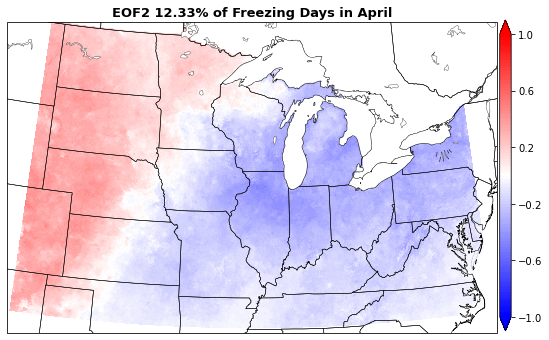

In [9]:
ii = 1
EOFs = pca1.components_[ii,:]
EOF_recons = np.ones(x*y) * -999.
EOF_recons[flag] = EOFs[:]
EOF_recons = np.ma.masked_values(EOF_recons.reshape((y, x)), -999.)

mon = ['March', 'April', 'May', 'Total']
title = [f'EOF1 {100*pca1.explained_variance_ratio_[ii]:.2f}%', f'EOF2 {100*pca1.explained_variance_ratio_[ii]:.2f}%']
extent = [-105, -75, 34, 49]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.add_feature(cartopy.feature.BORDERS, lw=.3, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.3, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)

levels = MaxNLocator(nbins=100).tick_values(-1, 1)
cmap = plt.get_cmap('bwr')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(Lon, Lat, np.where(mask, 100*EOF_recons, np.nan), cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title(f'{title[ii]} of Freezing Days in {mon[mi]}', fontsize=13, fontweight='bold')
fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.12, 0.02, 0.72])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(-1, 1.1, .4), extend='both')

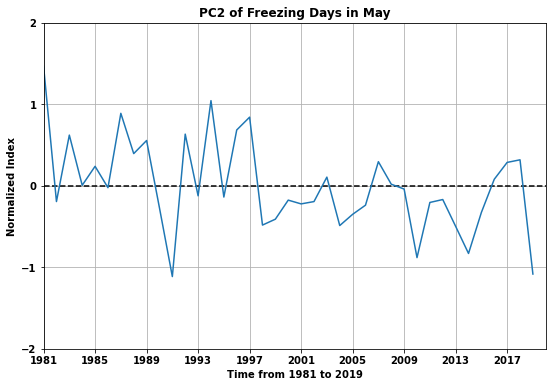

In [102]:
pc = (X1_pc[:, :2] - X1_pc[:, :2].mean()) / X1_pc[:, :2].std()
ll = [5, 2]
pc = pc[:, ii]
plt.figure(figsize=(9,6))
plt.plot(pc)
plt.xlabel('Time from 1981 to 2019', fontweight='bold')
plt.ylabel('Normalized Index', fontweight='bold')
plt.title(f'PC{ii+1} of Freezing Days in {mon[mi]}', fontsize='large', fontweight='bold')
plt.xticks(np.arange(0, 39, 4),[f'{1981+i}' for i in range(0, 39, 4)], fontweight='bold')
plt.yticks(np.arange(-ll[ii], ll[ii]+1), fontweight='bold')
plt.grid()
plt.ylim(-ll[ii], ll[ii])
plt.xlim(0, 39)
plt.hlines(0, 0, 39, 'k', ls='--')
plt.show()

Text(0.5, 1.0, 'spectral analysis of PC2 of Freezing Days in May')

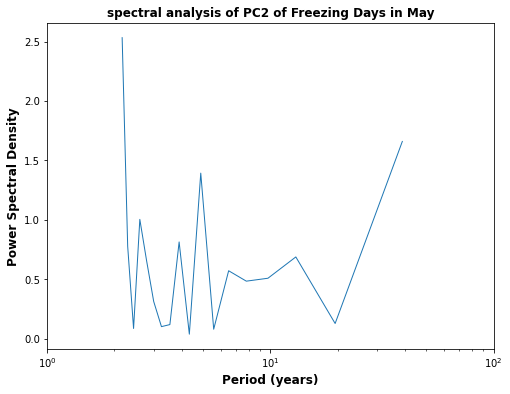

In [18]:
def spectrum1(h, dt):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * nt  # nt * dt is record length
    return freqs, psraw, psdraw
ii = 1
pc = (X1_pc[:, :2] - X1_pc[:, :2].mean()) / X1_pc[:, :2].std()
pc1 = pc[:, ii]
f, ps, psd = spectrum1(pc1, 1)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogx(1./f, psd, lw=1)
ax.set_xlim(1, 100)
ax.set_ylabel('Power Spectral Density', fontsize='large', fontweight='bold')
ax.set_xlabel('Period (years)', fontsize='large', fontweight='bold')
plt.title(f'spectral analysis of PC{ii+1} of Freezing Days in {mon[mi]}', fontsize='large', fontweight='bold')

In [40]:
indi = ['nino34.csv', 'nao.csv', 'pna.csv', 'pdo.csv']
mn = [str(i) for i in range(4, 12)]
indices_lag0 = []
indices_lag1 = []
indices_lag2 = []
indices_lag3 = []
for ii in range(4):
    df = pd.read_csv(f'./index/{indi[ii]}')
    indices_lag0.append(np.array([np.array(df['3'][1:]), np.array(df['4'][1:]), np.array(df['5'][1:])]))
    indices_lag1.append(np.array([np.array(df['2'][1:]), np.array(df['3'][1:]), np.array(df['4'][1:])]))
    indices_lag2.append(np.array([np.array(df['1'][1:]), np.array(df['2'][1:]), np.array(df['3'][1:])]))
    indices_lag3.append(np.array([np.array(df['12'][:-1]), np.array(df['1'][1:]), np.array(df['2'][1:])]))
indices = np.array([indices_lag0, indices_lag1, indices_lag2, indices_lag3])

In [41]:
pc = (X1_pc[:, :2] - X1_pc[:, :2].mean()) / X1_pc[:, :2].std()
slope = np.zeros((4, 4, 2))
pvalue = np.zeros((4, 4, 2))
for pi in range(2):
    for ii in range(4):
        for lag in range(4):
            index = indices[lag, ii, mi, :]
            r = stats.linregress(index, pc[:, pi])
            slope[ii, lag, pi] = r.rvalue
            pvalue[ii, lag, pi] = r.pvalue

In [42]:
IndName = [f'Nino34 m 0', f'Nino34 m -1', f'Nino34 m -2', f'Nino34 m -3',
           f'NAO m 0', f'NAO m -1', f'NAO m -2', f'NAO m -3',
           f'PNA m 0', f'PNA m -1', f'PNA m -2', f'PNA m -3',
           f'PDO m 0', f'PDO m -1', f'PDO m -2', f'PDO m -3'] 
        
table = [[[] for i in range(2)] for j in range(16)]
for ii in range(4):
    for lag in range(4):
        for pi in range(2):
            if pvalue[ii, lag, pi] < .05:
                table[ii*4+lag][pi] = f'{(slope[ii, lag, pi]):.3f}**'
            elif pvalue[ii, lag, pi] < .1:
                table[ii*4+lag][pi] = f'{(slope[ii, lag, pi]):.3f}*'
            else:
                table[ii*4+lag][pi] = f'{(slope[ii, lag, pi]):.3f}'
table = pd.DataFrame(table).T
table
table = table.rename(columns={i:IndName[i] for i in range(16)}, index={i:f'PC {i+1}' for i in range(2)})
print(f'Freezing Days in {mon[mi]} related to indices')
table.style.applymap(color_PositiveNegative)

Freezing Days in May related to indices


,Nino34 m 0,Nino34 m -1,Nino34 m -2,Nino34 m -3,NAO m 0,NAO m -1,NAO m -2,NAO m -3,PNA m 0,PNA m -1,PNA m -2,PNA m -3,PDO m 0,PDO m -1,PDO m -2,PDO m -3
PC 1,0.197,0.111,0.081,0.037,-0.153,-0.006,-0.041,0.071,0.236,-0.169,-0.086,-0.033,0.255,0.097,0.015,-0.170
PC 2,-0.010,-0.061,-0.005,-0.020,0.335**,0.072,0.063,0.135,0.334**,0.023,0.075,0.041,0.403**,0.422**,0.324**,0.365**


<font size=4 color=blue>regression on climate variables

In [9]:
import pygrib

In [21]:
DIR = '/home/mmfire/study/2019-FWI-nasa-raw-cook/Python/ERA5_DATA/'
grb = pygrib.open(DIR+'geopotential_500hPa_1979.grib')

Lat = grb.message(1).latlons()[0]
Lon = grb.message(1).latlons()[1] - 180

extent = [-105, -75, 34, 49]
lonl = 300
lonr = 420
latr = 224
latl = 164
# np.argmin(abs(Lat[:,0]-extent[3]))

Lon = Lon[latl:latr, lonl:lonr]
Lat = Lat[latl:latr, lonl:lonr]
y, x = Lon.shape

In [11]:
#500 hPa
gph = np.zeros((38, y, x)) * np.nan
for yl in range(38):
    grb = pygrib.open(DIR+f'geopotential_500hPa_{1981+yl}.grib')
    temp = np.zeros((y, x))
    for mi in range(12):
        data = grb.message(mi+1).data()[0][latl:latr, lonl:lonr]
        temp = temp + data
    gph[yl, :, :] = temp / 12.
gph_anml = gph - gph.mean(axis=0)

In [55]:
#700 hPa
gph = np.zeros((38, y, x)) * np.nan
for yl in range(38):
    grb = pygrib.open(DIR+f'geopotential_700hPa_{1981+yl}.grib')
    temp = np.zeros((y, x))
    for mi in range(12):
        data = grb.message(mi+1).data()[0][latl:latr, lonl:lonr]
        temp = temp + data
    gph[yl, :, :] = temp / 12.
gph_anml = gph - gph.mean(axis=0)

In [56]:
slope = np.zeros((2, y, x)) * np.nan
pvalue = np.zeros((2, y, x)) * np.nan
for i in range(y):
    for j in range(x):
        for pi in range(2):
            r = stats.linregress(pc[:, pi], gph_anml[:, i, j])
            slope[pi, i, j] = r.slope
            pvalue[pi, i, j] = r.pvalue

In [64]:
# extent = [-105, -75, 34, 49]
# ii = 1
# fig = plt.figure(figsize=(8, 6))
# ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
# ax.set_extent(extent)
# ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
# ax.add_feature(cartopy.feature.BORDERS, lw=.3, linestyle=':')
# ax.add_feature(cartopy.feature.COASTLINE, lw=.3, linestyle=':')
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor='white', lw=.3)

# pcm = plt.contourf(Lon, Lat, slope[ii, :, :], cmap='bwr', levels=np.linspace(-60, 60, 100), transform=ccrs.PlateCarree(), extend='both')
# plt.scatter(Lon, Lat, np.where(pvalue[ii, :, :]<0.05, 1, np.nan), 'grey', alpha=.1, transform=ccrs.PlateCarree())
# plt.title('anomalous 700-hPa geopotential height (gpm) regressed on PC 2', fontsize=13, fontweight='bold')
# fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
# cb_ax = fig.add_axes([0.905, 0.12, 0.02, 0.72])
# cbar = fig.colorbar(pcm, cax=cb_ax, ticks=np.arange(-60, 61, 12))